# Handwritten Digit Recognition

## made by-
##        Sibasish Padhy
 ##        Nithin Joseph 
 ##        Arnab Chakraborty

In [ ]:
# importing the necessary libraries 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



Fetching mnist dataset

In [ ]:
mnist=fetch_openml('mnist_784',version=1)
x=mnist["data"]
y=mnist["target"]
x.shape
y.shape

(70000,)

In [ ]:
y_df=pd.DataFrame(y)
y_df.head()

,0
0,5
1,0
2,4
3,1
4,9


In [ ]:

y_df.value_counts(ascending=True)

5    6313
4    6824
8    6825
6    6876
0    6903
9    6958
2    6990
3    7141
7    7293
1    7877
dtype: int64

Splitting into training and test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.13,random_state=101)
print('X_train shape:',X_train.shape)
print('Y_train shape:',Y_train.shape)
print('X_test shape:',X_test.shape)
print('Y_test shape:',Y_test.shape)

X_train shape: (60900, 784)
Y_train shape: (60900,)
X_test shape: (9100, 784)
Y_test shape: (9100,)


In [ ]:
train_data = pd.DataFrame(x)
train_data.shape
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001800,0.006714,0.003086,0.000129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000229,0.001329,0.011329,0.023071,0.043229,0.062243,0.117929,0.171243,...,3.572529,2.597929,1.659614,0.992457,0.541814,0.245643,0.080957,0.021000,0.000829,0.000843,0.0,0.0,0.0,0.0,0.0,0.0,0.002171,0.013357,0.036000,0.082671,0.122586,0.187657,0.310871,0.394871,0.495457,0.571071,0.669500,0.589571,0.479229,0.333600,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.440064,1.260218,0.816403,0.034017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060474,0.230432,1.322745,2.029539,2.951033,3.242019,4.820413,5.677191,...,26.274268,22.238669,17.840756,13.744477,10.299782,6.699808,3.631055,1.638692,0.136380,0.222999,0.0,0.0,0.0,0.0,0.0,0.0,0.405072,1.593527,2.409111,3.872385,4.709048,6.022443,7.421689,8.660856,9.605280,10.274678,11.236708,10.501991,9.448936,7.921717,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000

In [ ]:
# there are no missing values in the dataset 

train_data.isnull().sum().head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [ ]:
# about the dataset

# dimensions
print("Dimensions: ",train_data.shape, "\n")

# data types
print(train_data.info())

# head
train_data.head()

Dimensions:  (70000, 784) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: float64(784)
memory usage: 418.7 MB
None


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_data = pd.DataFrame(X_test)
test_data.shape
test_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
count,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,...,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.0,9100.0,9100.0,9100.0,9100.0,9100.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001758,0.005165,0.014505,0.023297,0.036154,0.036374,0.073297,0.106813,...,3.648352,2.545165,1.699670,1.067253,0.481758,0.203846,0.036593,0.000879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018242,0.090110,0.174945,0.363187,0.504505,0.408791,0.387363,0.588901,0.675385,0.575495,0.314505,0.188132,0.143626,0.063956,0.004945,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167726,0.492694,1.383736,2.222364,2.737782,2.636471,3.727563,4.537569,...,26.574012,21.690280,17.706973,14.186521,10.059445,5.837327,2.048988,0.061122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.162241,3.582113,5.884699,8.555404,9.834485,8.574655,7.981567,10.698257,11.641941,10.803306,7.789684,5.816363,5.299257,2.982544,0.343367,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
# is there are no missing values in the test dataset 

test_data.isnull().sum().head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [ ]:
# about the dataset

# dimensions
print("Dimensions: ",test_data.shape, "\n")

# data types
print(test_data.info())

# head
test_data.head()

Dimensions:  (9100, 784) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9100 entries, 0 to 9099
Columns: 784 entries, 0 to 783
dtypes: float64(784)
memory usage: 54.4 MB
None


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


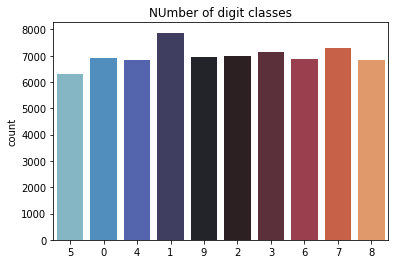

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g=sns.countplot(mnist['target'], palette = 'icefire')
plt.title('NUmber of digit classes')
plt.show(g)



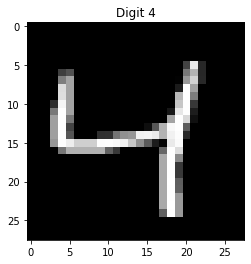

In [ ]:
# Plotting some samples as well as converting into matrix

four = train_data.iloc[2,0:]
four.shape
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")
plt.show()

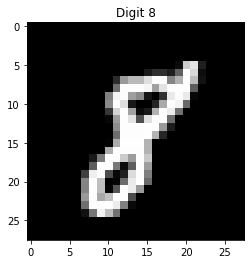

In [ ]:
eight = train_data.iloc[17, 0:]
eight.shape
eight = eight.values.reshape(28, 28)
plt.imshow(eight, cmap='gray')
plt.title("Digit 8")
plt.show()


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,test_size=0.13,random_state=101)


## SVM


In [ ]:
from sklearn.svm import SVC

In [ ]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predict
y_pred = model_linear.predict(x_test)


In [ ]:
# confusion matrix and accuracy


# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9098901098901099 

[[894   1   2   4   1   7   9   0   3   0]
 [  0 984   2   5   1   2   1   3   6   1]
 [  9  12 819  23   9   3   5  11  14   1]
 [  4  12  28 836   2  29   1   9  22   5]
 [  2   3   9   1 808   0   5   5   1  28]
 [ 15   6  11  45   7 703  20   2  16   4]
 [ 11   2  19   1   1  14 860   0   1   0]
 [  2   7  11   6   9   1   1 906   1  35]
 [  7  22  19  37   3  29   7   6 710   7]
 [  3   3   4  18  46   7   0  49   4 760]]


In [ ]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(x_train, y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predict
y_pred = non_linear_model.predict(X_test)




In [ ]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9634065934065934 

[[906   2   2   1   0   2   4   0   4   0]
 [  0 989   5   2   1   1   1   1   2   3]
 [  4   2 874   6   3   0   5   8   3   1]
 [  0   6  11 900   0   8   1   8  10   4]
 [  1   3   4   0 826   1   5   3   0  19]
 [  2   0   2  15   3 785  13   1   3   5]
 [  7   2   2   0   0   7 890   0   1   0]
 [  1   2   5   1   7   1   1 941   2  18]
 [  1   4   3  10   3  11   4   2 805   4]
 [  2   3   1  13   9   0   0  12   3 851]]


## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
clf = DecisionTreeClassifier()

# Training Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [ ]:
#Predicting the response on test dataset
y_pred1 = clf.predict(x_test)

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred1))

Accuracy: 0.8159340659340659
[[821   3  19   4   5  21  15   7  18   8]
 [  0 925  16   3   7   8  13  15  11   7]
 [ 23  18 690  33  20  25  30  25  31  11]
 [ 10  10  37 734  14  56  10  10  37  30]
 [  5   7  18   8 699  13  14  16  24  58]
 [ 21  13  13  51  15 599  35  15  37  30]
 [ 16   7  15   6  21  28 793   3  14   6]
 [  3  13  29  12  18  12   1 838  14  39]
 [ 16  23  41  36  25  25  17   9 618  37]
 [  4  10  15  17  43  21   6  25  45 708]]


## Random Forest

using random forrest classifier to classify the data

In [ ]:
from sklearn.ensemble import RandomForestClassifier


Running the model for training data


In [ ]:
model1=RandomForestClassifier(random_state=42)

In [ ]:
model1.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

predicting the model and evaluating


In [ ]:
y_pred2 = model1.predict(x_test)
score = accuracy_score(y_test, y_pred2)
print("Accuracy score after training on existing dataset", score)
confusion=confusion_matrix(y_test,y_pred2)
print("confusion matrix",confusion)

Accuracy score after training on existing dataset 0.9543956043956044
confusion matrix [[903   1   1   1   0   4   5   0   6   0]
 [  0 982   7   4   1   3   1   1   2   4]
 [  6   1 855   6   6   2   6  12  11   1]
 [  2   2  14 886   1  17   1   7  13   5]
 [  4   3   0   1 827   0   4   3   2  18]
 [  4   0   3  22   3 774  10   2   4   7]
 [  8   2   2   0   3  10 881   0   3   0]
 [  1   1  11   1   9   2   0 937   2  15]
 [  2   3   8  10   4  10   7   2 790  11]
 [  5   3   2  14   8   0   0   6   6 850]]


## Xgboost

using XGB classifier to classify datasets

In [ ]:
from xgboost import XGBClassifier

Running the model for training datset

In [ ]:
model=XGBClassifier()
model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

predicting the model and evaluating


In [ ]:
y_pred=model.predict(X_test)
score=accuracy_score(Y_test,y_pred)
print("Accuracy score after training on existing dataset", score)
confusion=confusion_matrix(Y_test,y_pred)
print("confusion matrix",confusion)



Accuracy score after training on existing dataset 0.9325274725274725
confusion matrix [[894   2   1   3   5   0   3   1   9   3]
 [  0 976   4   6   2   4   3   4   5   1]
 [  6   3 840  11   9   1   5  17  12   2]
 [  4  10  15 862   1  21   3   5  19   8]
 [  4   3   5   1 791   2   3   4   5  44]
 [  6   3   5  20   6 753  14   3   8  11]
 [ 10   2   1   0   4  12 875   1   4   0]
 [  1   3   7   8   9   1   0 918   2  30]
 [  4   8   7  17   5  12   7   5 762  20]
 [  2   4   1  11  24   6   0  23   8 815]]


## CNN

In [ ]:
#@title Default title text
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K



In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


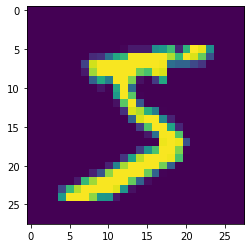

In [ ]:
plt.imshow(x_train[0])

In [ ]:
num_classes=10

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 [==============================] - 154s 326ms/step - loss: 2.2924 - accuracy: 0.1143 - val_loss: 2.2380 - val_accuracy: 0.2608
Epoch 2/10
469/469 [==============================] - 151s 322ms/step - loss: 2.2310 - accuracy: 0.2073 - val_loss: 2.1595 - val_accuracy: 0.3954
Epoch 3/10
469/469 [==============================] - 152s 325ms/step - loss: 2.1543 - accuracy: 0.3178 - val_loss: 2.0540 - val_accuracy: 0.5723
Epoch 4/10
469/469 [==============================] - 152s 325ms/step - loss: 2.0506 - accuracy: 0.4347 - val_loss: 1.9108 - val_accuracy: 0.6974
Epoch 5/10
469/469 [==============================] - 152s 325ms/step - loss: 1.9119 - accuracy: 0.5319 - val_loss: 1.7207 - val_accuracy: 0.7571
Epoch 6/10
469/469 [==============================] - 153s 326ms/step - loss: 1.7281 - accuracy: 0.6048 - val_loss: 1.4884 - val_accuracy: 0.7863
Epoch 7/10
469/469 [==============================] - 153s 327ms/step - loss: 1.5197 - accuracy: 0.6481 - val_loss: 1.2462 -

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', round(score[1]*100, 2))

Test loss: 0.7580962181091309
Test accuracy: 84.17
